In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import Binarizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset grad/Flood Prediction Factors.csv")

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [7]:
df["FloodProbability"] = np.where(df['FloodProbability'] > 0.5, 1, 0)

In [8]:
df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0


In [9]:
df.isna().sum()


MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [10]:
df.duplicated().sum()


0

In [11]:
corr = df.corr()

<Axes: >

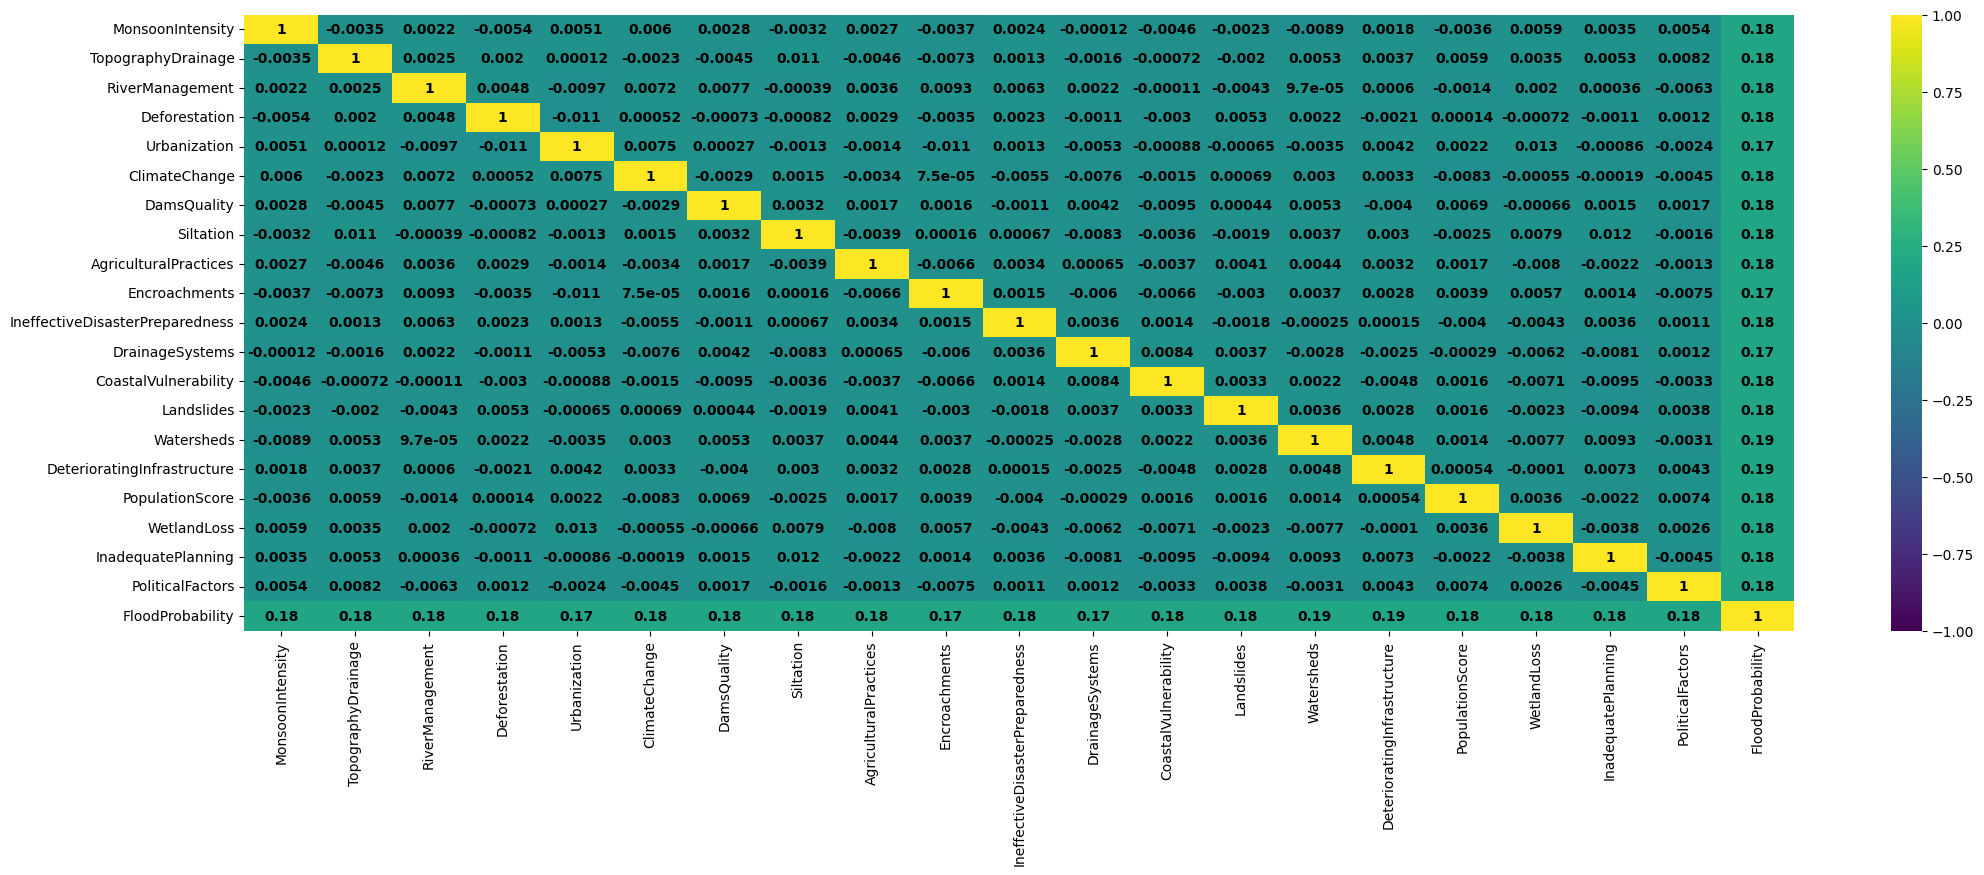

In [12]:
plt.figure(figsize=(25, 8))
sns.heatmap(corr , vmin=-1 , vmax=1, cmap="viridis", annot=True, annot_kws={"color": "black", "fontweight": "bold"})

<Axes: >

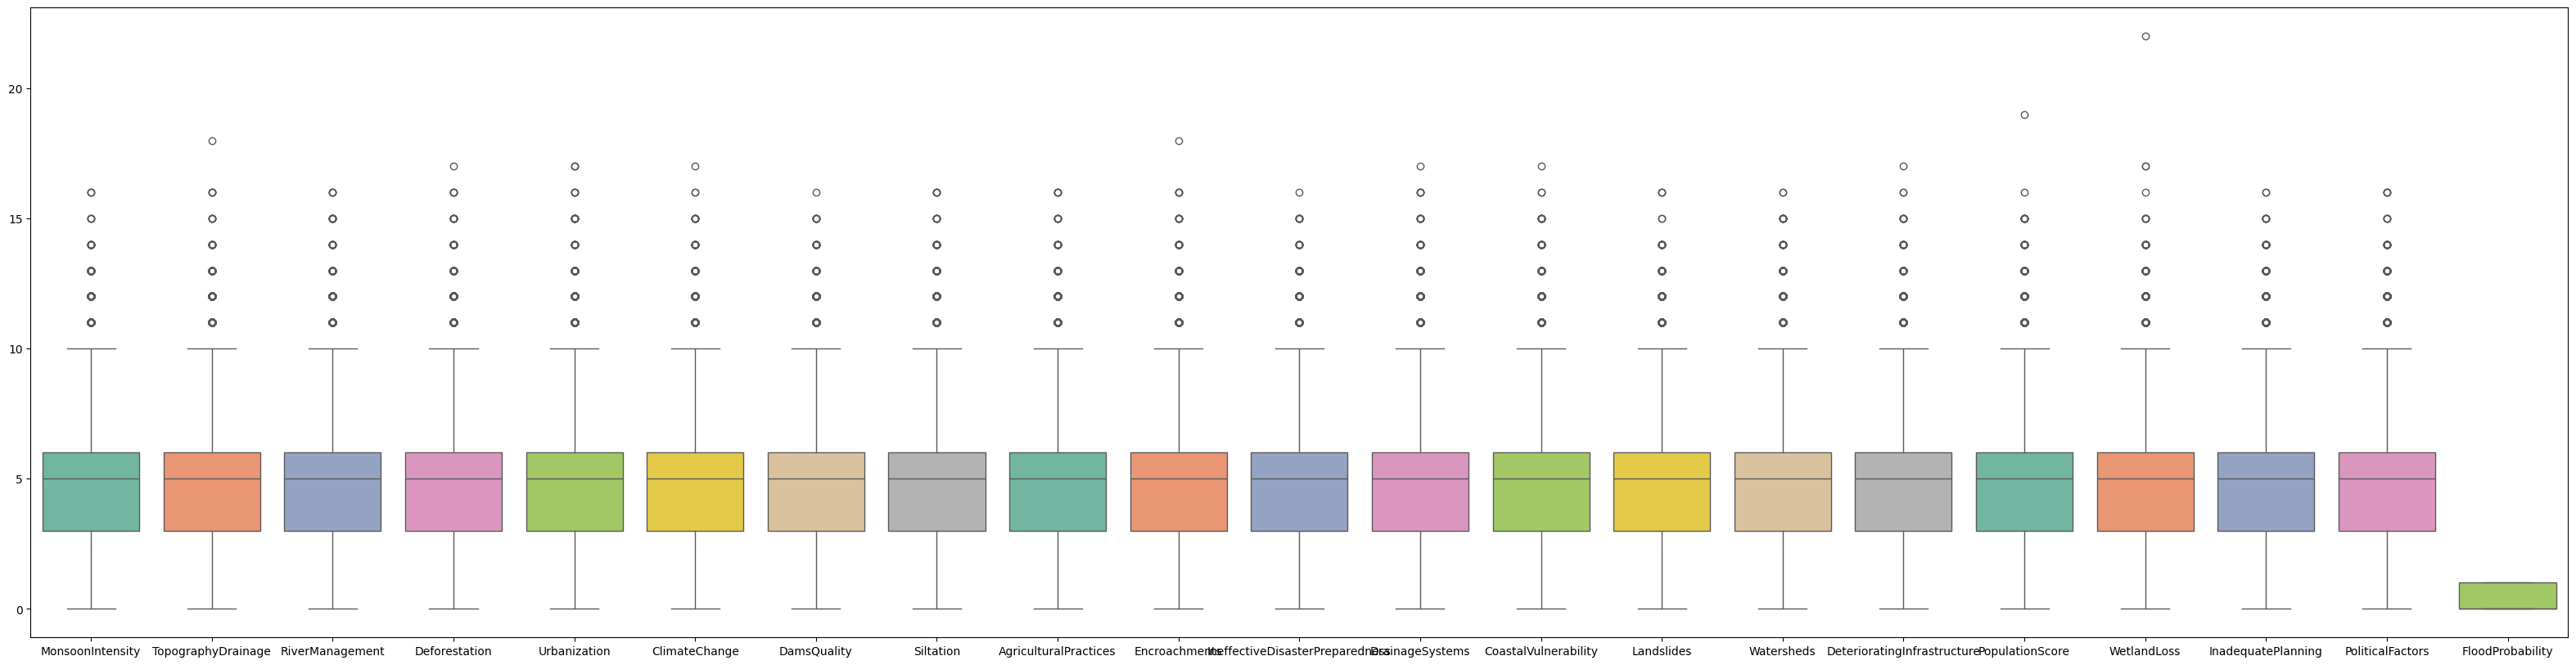

In [13]:
plt.figure(figsize=(40, 10))
sns.boxplot(data=df, orient="v", palette="Set2")

In [14]:
def z_score(df, column_name):

    x = df[column_name]

    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (x < lower_bound) | (x > upper_bound)

    df_cleaned = df[~outliers]

    return df_cleaned

In [15]:
columns_to_normalize = ["MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation", "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices", "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems", "CoastalVulnerability", "Landslides", "Watersheds", "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss"]

df_cleaned = df.copy()  # Create a copy of the original DataFrame

for column in columns_to_normalize:
    df_cleaned = z_score(df_cleaned,column)

<Axes: >

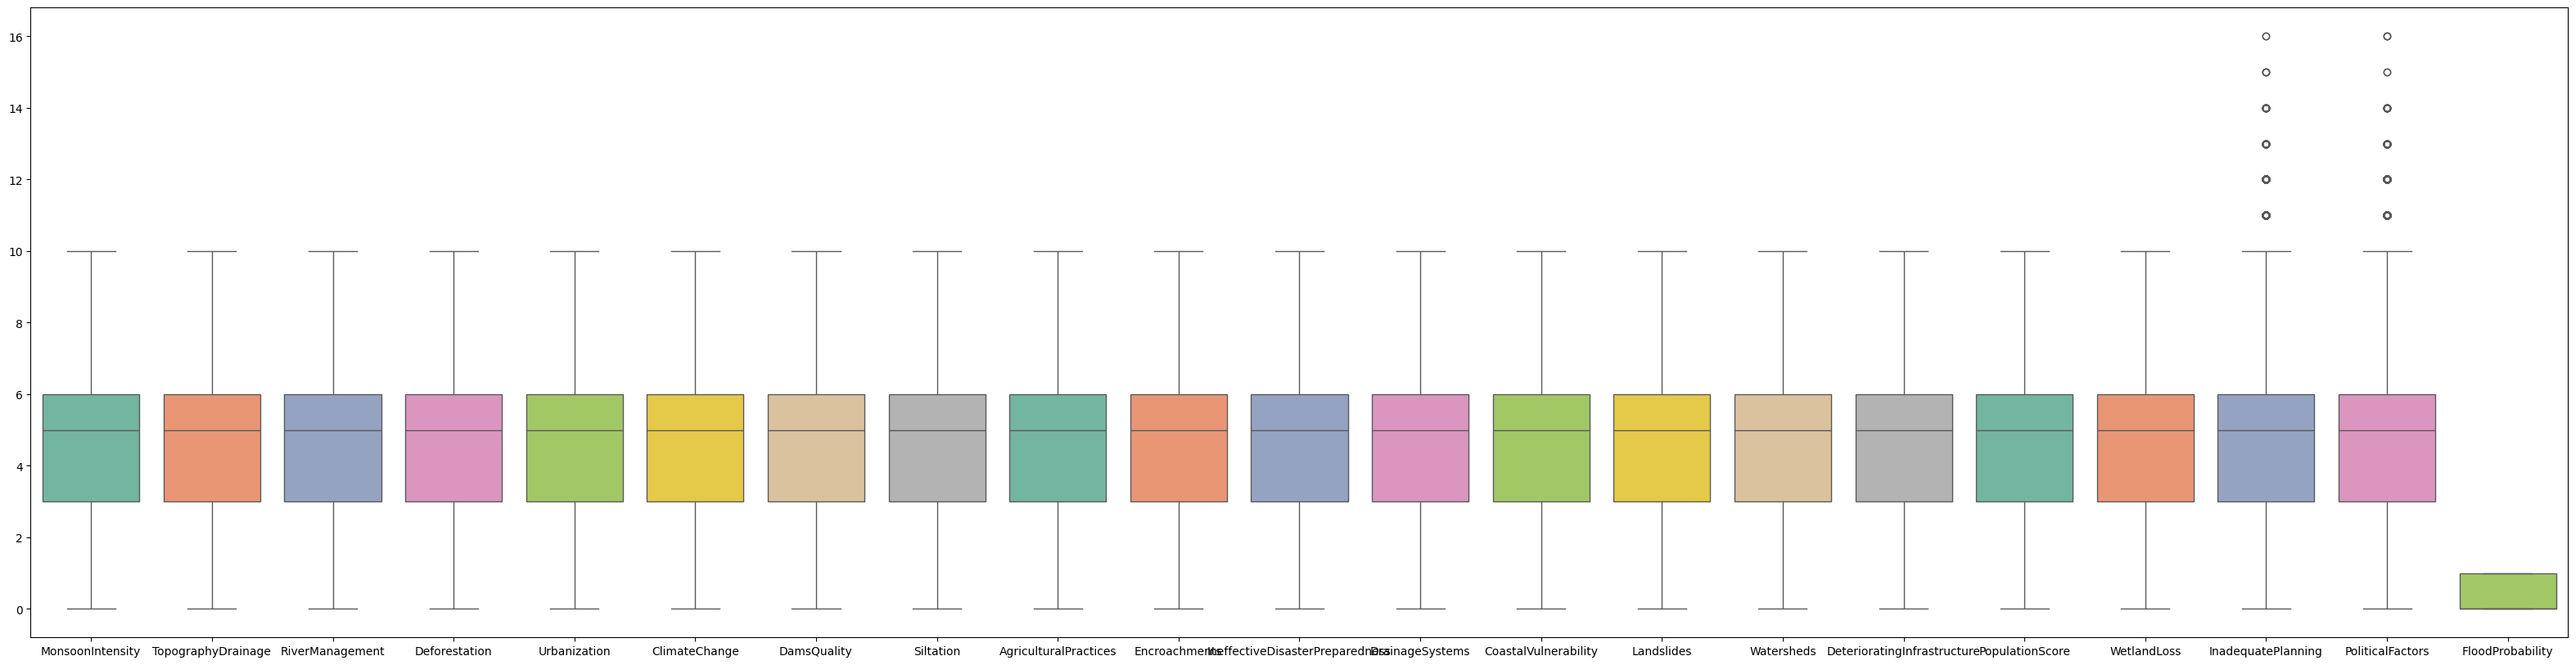

In [16]:
plt.figure(figsize=(40, 10))
sns.boxplot(data=df_cleaned, orient="v", palette="Set2")

In [17]:
num_0 = (df_cleaned["FloodProbability"] == 0).sum()
num_1 = (df_cleaned["FloodProbability"] == 1).sum()

print("number of class 0: ",num_0)
print("number of class 1: ",num_1)

number of class 0:  23283
number of class 1:  15707


In [18]:
def balance_data(num_to_delete,df,name_of_col):

    class_0_rows = df[df[name_of_col] == 0]

    if num_to_delete > len(class_0_rows):
        df = df[df[name_of_col] != 0]
    else:

        rows_to_delete = class_0_rows.sample(n=num_to_delete, random_state=42).index

        df = df.drop(rows_to_delete)

    return df

In [19]:
df = balance_data(7897,df_cleaned,"FloodProbability")

In [20]:
num_0 = (df["FloodProbability"] == 0).sum()
num_1 = (df["FloodProbability"] == 1).sum()

print("number of class 0: ",num_0)
print("number of class 1: ",num_1)

number of class 0:  15386
number of class 1:  15707


In [21]:
x = df.drop("FloodProbability" , axis = 1)
y = df["FloodProbability"]

In [22]:
x = np.array(x)
y = np.array(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state=42)

In [24]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(21765, 20) (9328, 20) (21765,) (9328,)


In [25]:
yy = np.concatenate([y_train, y_test])

<ipython-input-26-bd2e3c8e10c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=yy.ravel(), palette='Set2')


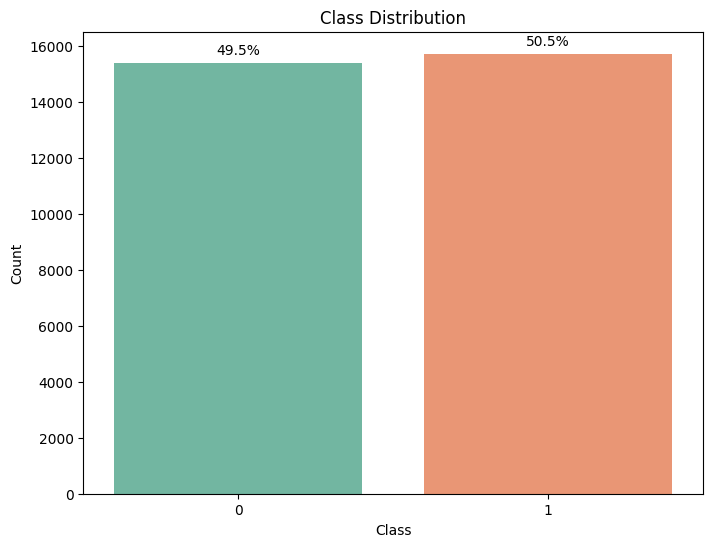

In [26]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=yy.ravel(), palette='Set2')

total = len(yy)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01 * total, f'{height/total:.1%}', ha="center")

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# Train Logistic Regression
logreg = LogisticRegression(max_iter=3000, random_state=42)
logreg.fit(x_train, y_train)

# Predict using Logistic Regression
y_pred_logreg = logreg.predict(x_test)

# Calculate accuracy, confusion matrix, and classification report for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

# Train XGBoost
xgboost = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
xgboost.fit(x_train, y_train)

# Predict using XGBoost
y_pred_xgboost = xgboost.predict(x_test)

# Calculate accuracy, confusion matrix, and classification report for XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
classification_rep_xgboost = classification_report(y_test, y_pred_xgboost)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

# Predict using KNN
y_pred_knn = knn.predict(x_test)

# Calculate accuracy, confusion matrix, and classification report for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Compare accuracies
accuracies = {
    'Logistic Regression': accuracy_logreg,
    'XGBoost': accuracy_xgboost,
    'KNN': accuracy_knn
}

print("Accuracy for Logistic Regression:", accuracy_logreg)
print("Accuracy for XGBoost:", accuracy_xgboost)
print("Accuracy for KNN:", accuracy_knn)

Accuracy for Logistic Regression: 1.0
Accuracy for XGBoost: 0.9263507718696398
Accuracy for KNN: 0.8435891938250428


In [28]:
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

In [29]:
print("\nBest Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: Logistic Regression
Best Accuracy: 1.0


Confusion Matrix for Logistic Regression:
 [[4620    0]
 [   0 4708]]


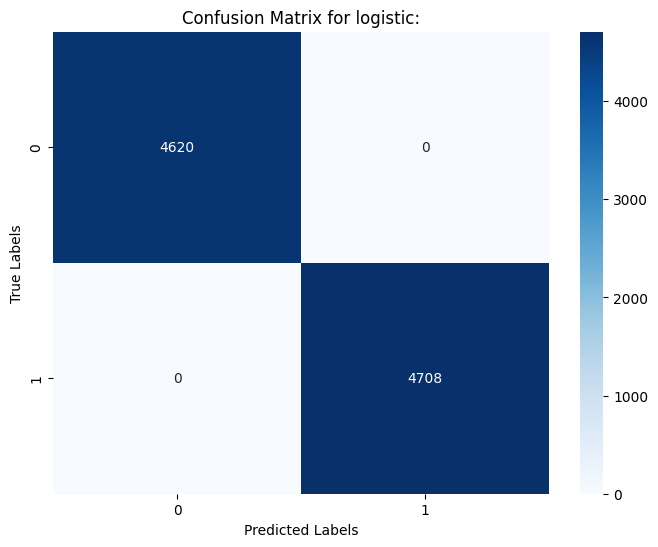

Confusion Matrix for XGBoost:
 [[4234  386]
 [ 301 4407]]


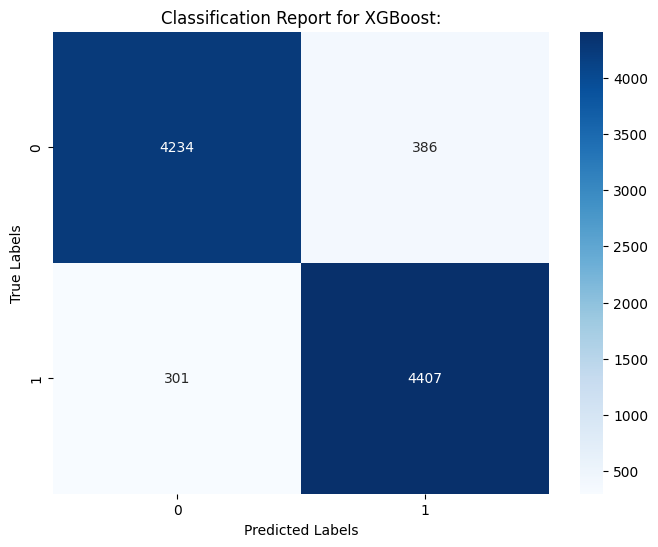

Confusion Matrix for KNN:
 [[4287  333]
 [1126 3582]]


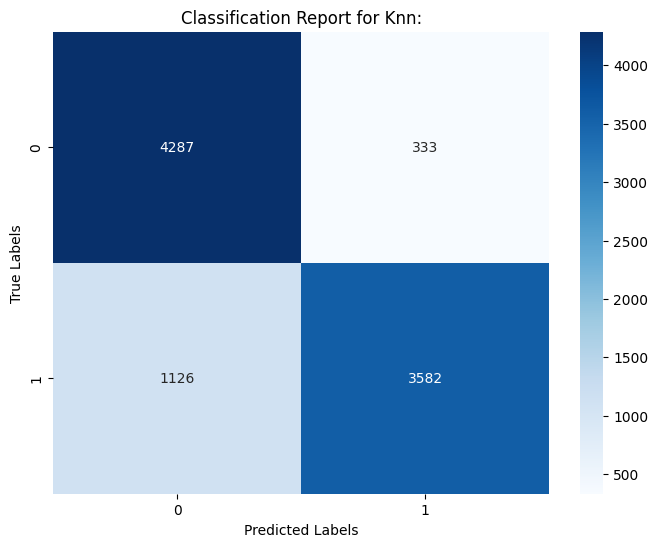

In [83]:
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_logreg)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix for logistic:")
plt.show()

print("Confusion Matrix for XGBoost:\n", conf_matrix_xgboost)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Classification Report for XGBoost:")
plt.show()

print("Confusion Matrix for KNN:\n", conf_matrix_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Classification Report for Knn:")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

# Train Linear Regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)


# Train MLP
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)



# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)


# Train SVR
svr = SVR()
svr.fit(x_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR()

In [32]:
# Predict using Linear Regression
y_pred_linreg = linreg.predict(x_test)
y_pred_linreg_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_linreg]  # Assuming binary classification

In [33]:

# Predict using MLP
y_pred_mlp = mlp.predict(x_test)

In [34]:
# Predict using Decision Tree
y_pred_dt = decision_tree.predict(x_test)

In [35]:
# Predict using SVR
y_pred_svr = svr.predict(x_test)
y_pred_svr_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_svr]  # Assuming binary classification

In [36]:

# Calculate accuracy, confusion matrix, and classification report for SVR
accuracy_svr = accuracy_score(y_test, y_pred_svr_binary)
conf_matrix_svr = confusion_matrix(y_test, y_pred_svr_binary)
classification_rep_svr = classification_report(y_test, y_pred_svr_binary)

Accuracy for SVR: 0.9469339622641509
Confusion Matrix for SVR:
[[4277  343]
 [ 152 4556]]
Classification Report for SVR:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4620
           1       0.93      0.97      0.95      4708

    accuracy                           0.95      9328
   macro avg       0.95      0.95      0.95      9328
weighted avg       0.95      0.95      0.95      9328



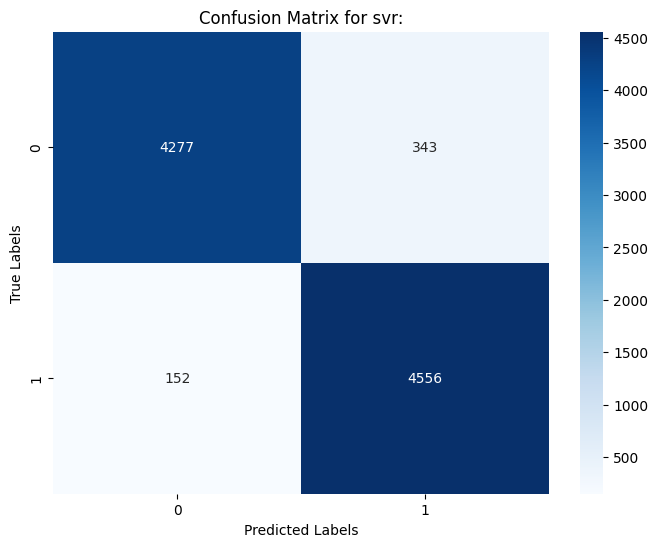

In [84]:
print("Accuracy for SVR:", accuracy_svr)
print("Confusion Matrix for SVR:")
print(conf_matrix_svr)
print("Classification Report for SVR:")
print(classification_rep_svr)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix for svr:")
plt.show()

In [38]:
# Calculate accuracy, confusion matrix, and classification report for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

Accuracy for Decision Tree: 0.6873927958833619
Confusion Matrix for Decision Tree:
[[3183 1437]
 [1479 3229]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      4620
           1       0.69      0.69      0.69      4708

    accuracy                           0.69      9328
   macro avg       0.69      0.69      0.69      9328
weighted avg       0.69      0.69      0.69      9328



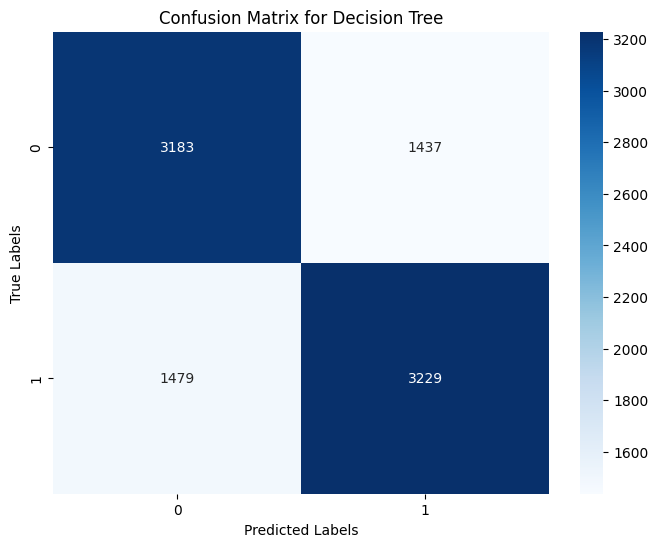

In [39]:
print("Accuracy for Decision Tree:", accuracy_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)
print("Classification Report for Decision Tree:")
print(classification_rep_dt)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [40]:
# Calculate accuracy, confusion matrix, and classification report for MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

Accuracy for MLP: 0.9764150943396226
Confusion Matrix for MLP:
[[4424  196]
 [  24 4684]]
Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4620
           1       0.96      0.99      0.98      4708

    accuracy                           0.98      9328
   macro avg       0.98      0.98      0.98      9328
weighted avg       0.98      0.98      0.98      9328



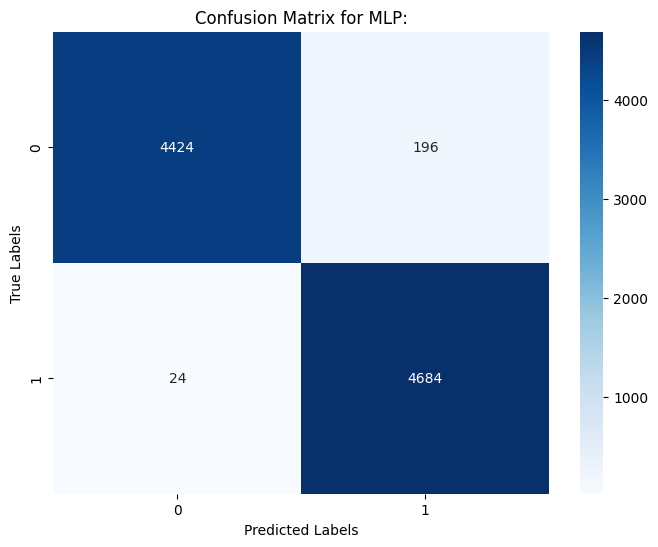

In [85]:
print("Accuracy for MLP:", accuracy_mlp)
print("Confusion Matrix for MLP:")
print(conf_matrix_mlp)
print("Classification Report for MLP:")
print(classification_rep_mlp)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix for MLP:")
plt.show()

In [42]:
# Calculate accuracy, confusion matrix, and classification report for Linear Regression
accuracy_linreg = accuracy_score(y_test, y_pred_linreg_binary)
conf_matrix_linreg = confusion_matrix(y_test, y_pred_linreg_binary)
classification_rep_linreg = classification_report(y_test, y_pred_linreg_binary)

Accuracy for Linear Regression: 0.9711620926243568
Confusion Matrix for Linear Regression:
[[4351  269]
 [   0 4708]]
Classification Report for Linear Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4620
           1       0.95      1.00      0.97      4708

    accuracy                           0.97      9328
   macro avg       0.97      0.97      0.97      9328
weighted avg       0.97      0.97      0.97      9328



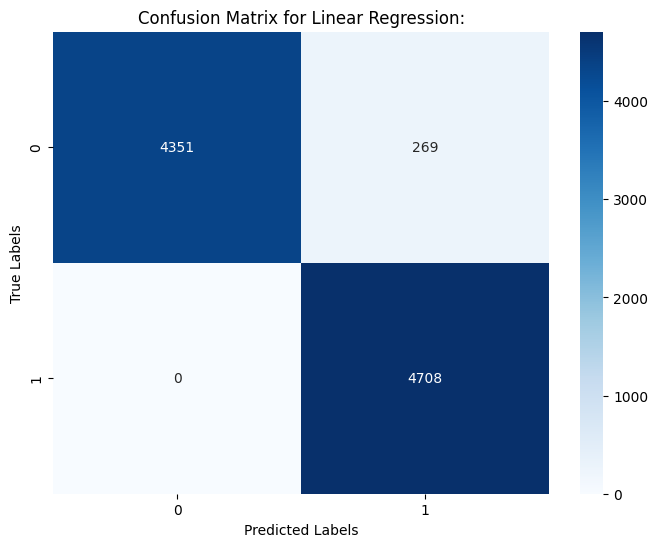

In [86]:
print("Accuracy for Linear Regression:", accuracy_linreg)
print("Confusion Matrix for Linear Regression:")
print(conf_matrix_linreg)
print("Classification Report for Linear Regression:")
print(classification_rep_linreg)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linreg, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix for Linear Regression:")
plt.show()

In [44]:

# Compare accuracies
accuracies = {
    'Linear Regression': accuracy_linreg,
    'MLP': accuracy_mlp,
    'SVR': accuracy_svr
}

print("Accuracy for Linear Regression:", accuracy_linreg)
print("Accuracy for MLP:", accuracy_mlp)
print("Accuracy for Logistic Regression:", accuracy_logreg)
print("Accuracy for SVR:", accuracy_svr)

Accuracy for Linear Regression: 0.9711620926243568
Accuracy for MLP: 0.9764150943396226
Accuracy for Logistic Regression: 1.0
Accuracy for SVR: 0.9469339622641509


In [45]:
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

In [46]:
print("\nBest Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: MLP
Best Accuracy: 0.9764150943396226


# ROC Curves for Different Models

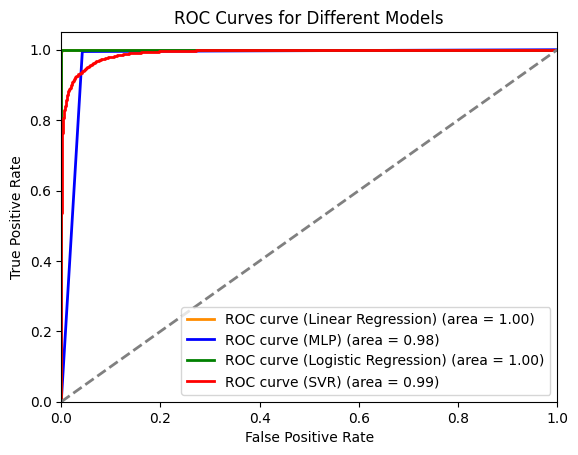

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for each model
fpr_linreg, tpr_linreg, _ = roc_curve(y_test, y_pred_linreg)
roc_auc_linreg = auc(fpr_linreg, tpr_linreg)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_svr, tpr_svr, _ = roc_curve(y_test, y_pred_svr)
roc_auc_svr = auc(fpr_svr, tpr_svr)

# Plot ROC curve for each model
plt.figure()
plt.plot(fpr_linreg, tpr_linreg, color='darkorange', lw=2, label='ROC curve (Linear Regression) (area = %0.2f)' % roc_auc_linreg)
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='ROC curve (MLP) (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='ROC curve (Logistic Regression) (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_svr, tpr_svr, color='red', lw=2, label='ROC curve (SVR) (area = %0.2f)' % roc_auc_svr)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

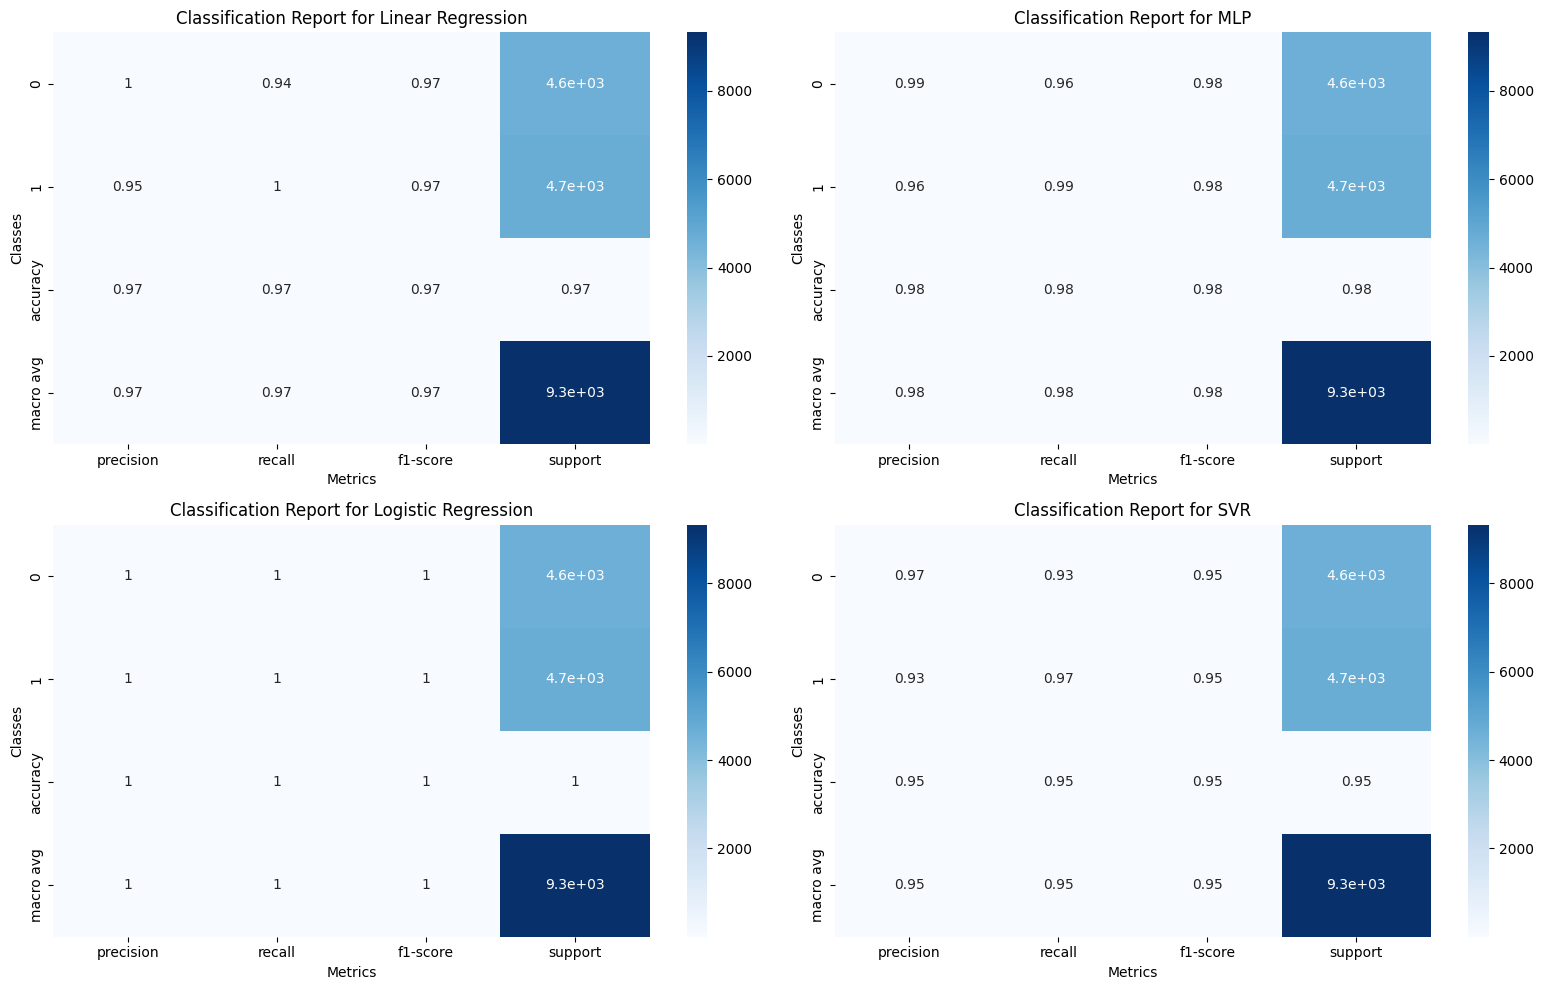

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification reports for each model
classification_reports = {
    'Linear Regression': classification_report(y_test, y_pred_linreg_binary, output_dict=True),
    'MLP': classification_report(y_test, y_pred_mlp, output_dict=True),
    'Logistic Regression': classification_report(y_test, y_pred_logreg, output_dict=True),
    'SVR': classification_report(y_test, y_pred_svr_binary, output_dict=True)
}

# Convert classification reports to DataFrames
report_dfs = {model: pd.DataFrame(report).transpose() for model, report in classification_reports.items()}

# Plot classification reports as heatmaps
plt.figure(figsize=(16, 10))
for i, (model, df) in enumerate(report_dfs.items(), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap="Blues")
    plt.title(f"Classification Report for {model}")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
plt.tight_layout()
plt.show()


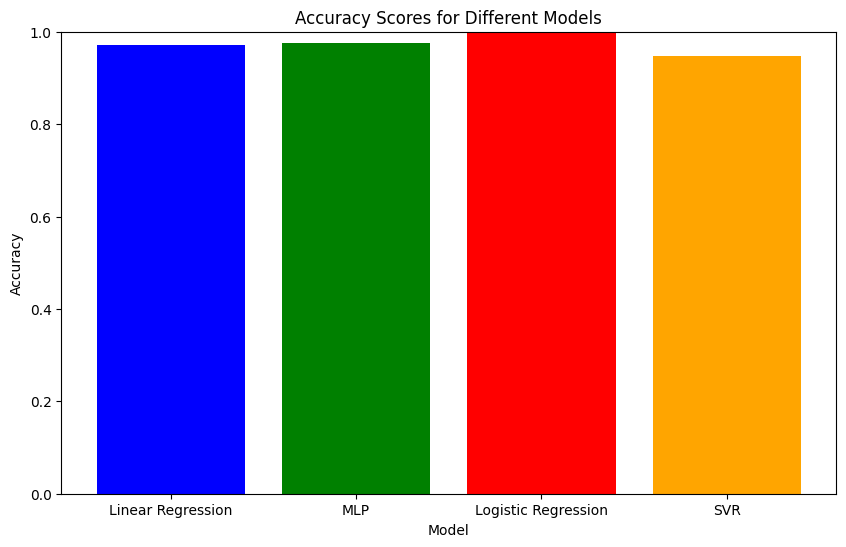

In [49]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Linear Regression': accuracy_linreg,
    'MLP': accuracy_mlp,
    'Logistic Regression': accuracy_logreg,
    'SVR': accuracy_svr
}

# Define colors for each model
colors = ['blue', 'green', 'red', 'orange']

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy scores
plt.show()


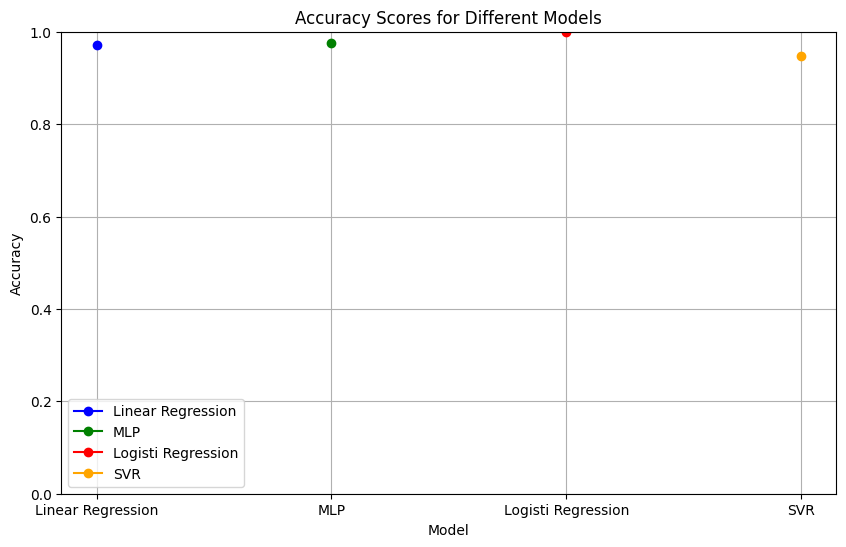

In [50]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Linear Regression': accuracy_linreg,
    'MLP': accuracy_mlp,
    'Logisti Regression': accuracy_logreg,
    'SVR': accuracy_svr
}

# Define colors for each model
colors = ['blue', 'green', 'red', 'orange']

# Plot accuracy scores
plt.figure(figsize=(10, 6))
for i, (model, score) in enumerate(accuracy_scores.items()):
    plt.plot(model, score, marker='o', linestyle='-', color=colors[i], label=model)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy scores
plt.legend()
plt.grid(True)
plt.show()


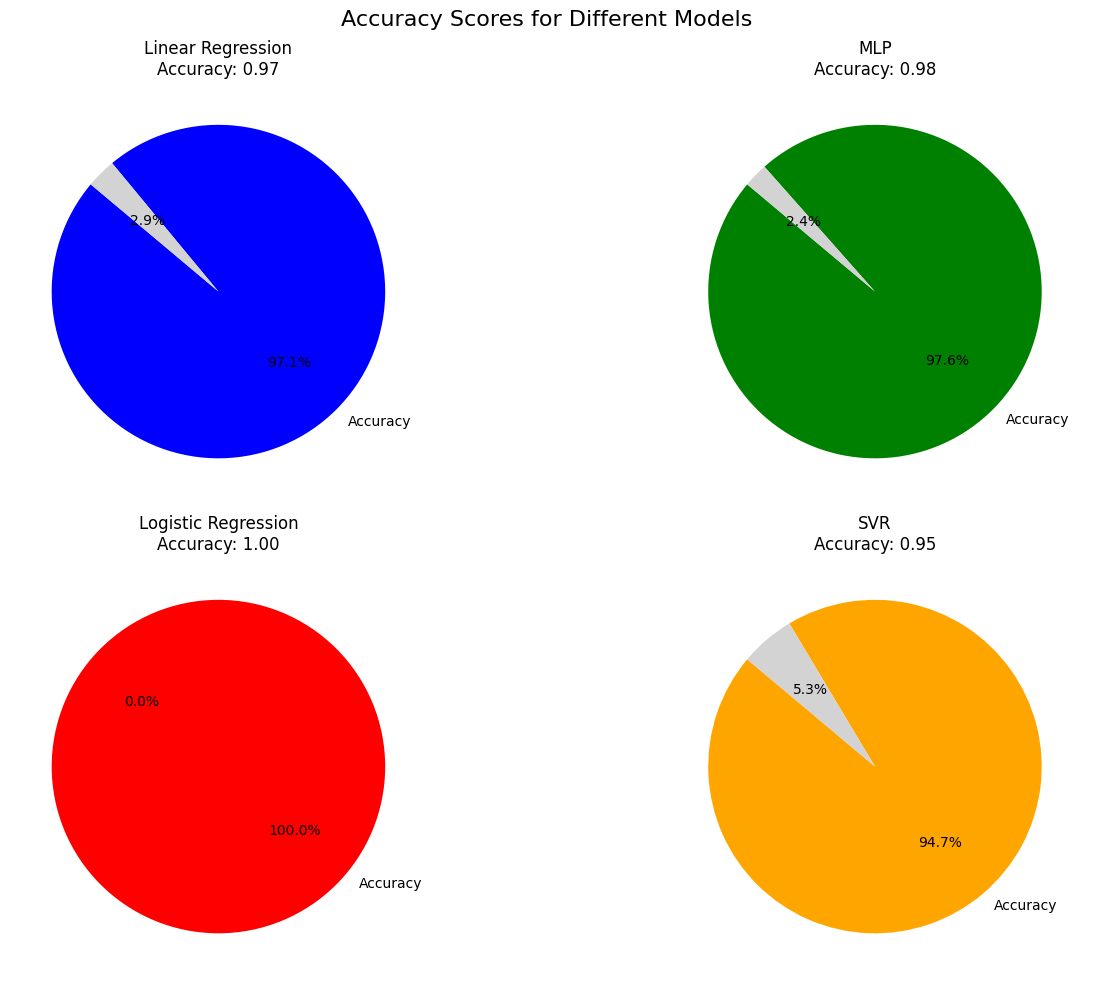

In [51]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Linear Regression': accuracy_linreg,
    'MLP': accuracy_mlp,
    'Logistic Regression': accuracy_logreg,
    'SVR': accuracy_svr
}

# Define colors for each model
colors = ['blue', 'green', 'red', 'orange']

# Plot accuracy scores as pie charts
plt.figure(figsize=(15, 10))
for i, (model, score) in enumerate(accuracy_scores.items()):
    plt.subplot(2, 2, i+1)
    plt.pie([score, 1-score], labels=['Accuracy', ''], colors=[colors[i], 'lightgray'], autopct='%1.1f%%', startangle=140)
    plt.title(f'{model}\nAccuracy: {score:.2f}')

plt.suptitle('Accuracy Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.show()


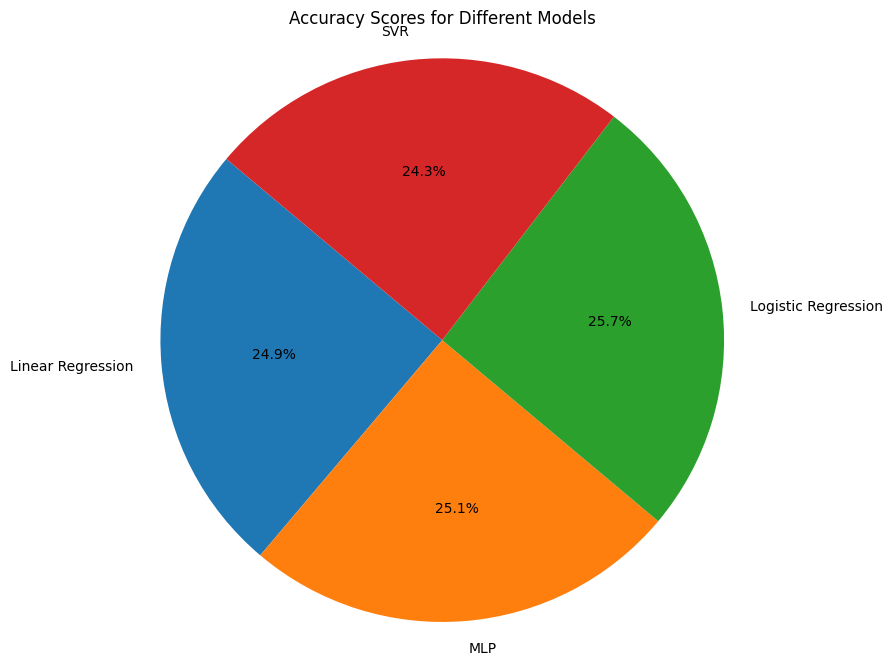

In [52]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Linear Regression': accuracy_linreg,
    'MLP': accuracy_mlp,
    'Logistic Regression': accuracy_logreg,
    'SVR': accuracy_svr
}

# Combine model names and accuracy scores
labels = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Plot accuracy scores as a combined pie chart
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Scores for Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


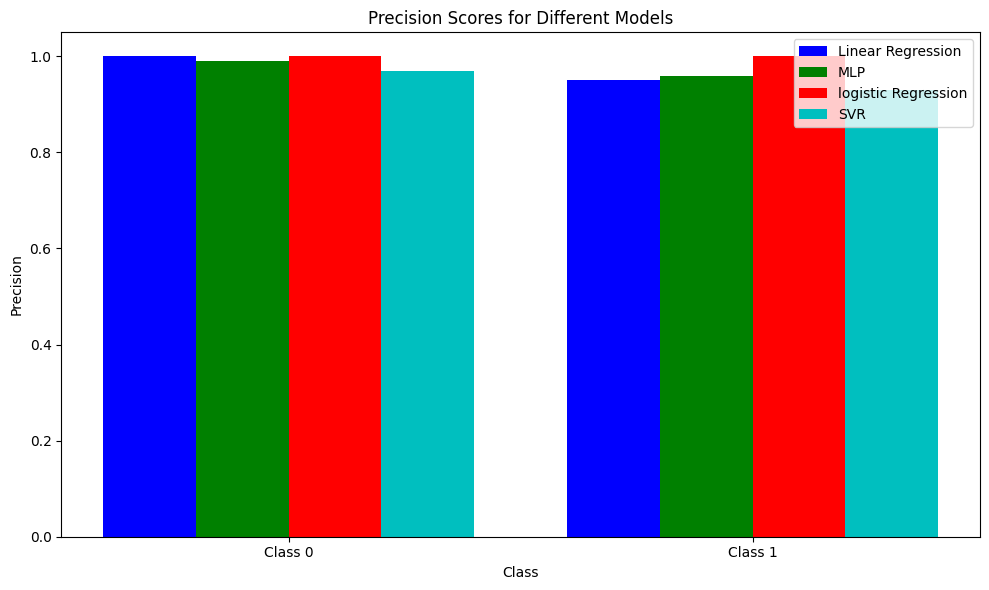

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Precision scores for each model and class
precision_scores = {
    'Linear Regression': classification_rep_linreg.split('\n')[2:-5],
    'MLP': classification_rep_mlp.split('\n')[2:-5],
    'logistic Regression': classification_rep_logreg.split('\n')[2:-5],
    'SVR': classification_rep_svr.split('\n')[2:-5]
}

# Extract precision scores for each model
precision_data = {}
for model, precision in precision_scores.items():
    precision_data[model] = [float(p.split()[1]) for p in precision]

# Get class labels
class_labels = [f'Class {i}' for i in range(len(precision_data['Linear Regression']))]

# Plot precision scores
num_models = len(precision_data)
bar_width = 0.2
index = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c']  # Define colors for each model
for i, (model, precisions) in enumerate(precision_data.items()):
    plt.bar(index + i * bar_width, precisions, bar_width, label=model, color=colors[i])

plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Models')
plt.xticks(index + bar_width * (num_models - 1) / 2, class_labels)
plt.legend()
plt.tight_layout()
plt.show()


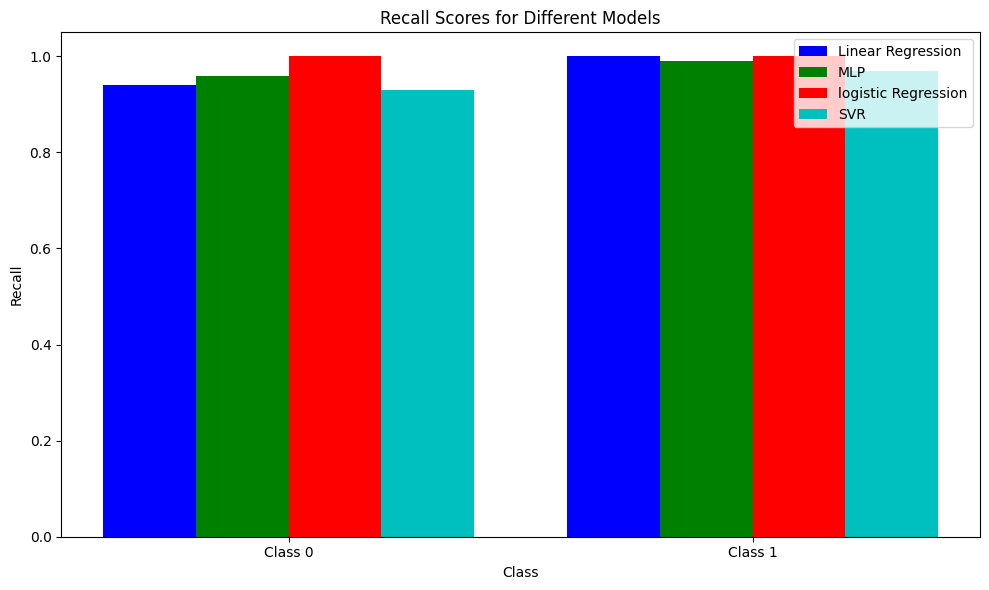

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Recall scores for each model and class
recall_scores = {
    'Linear Regression': classification_rep_linreg.split('\n')[2:-5],
    'MLP': classification_rep_mlp.split('\n')[2:-5],
    'logistic Regression': classification_rep_logreg.split('\n')[2:-5],
    'SVR': classification_rep_svr.split('\n')[2:-5]
}

# Extract recall scores for each model
recall_data = {}
for model, recall in recall_scores.items():
    recall_data[model] = [float(r.split()[2]) for r in recall]

# Get class labels
class_labels = [f'Class {i}' for i in range(len(recall_data['Linear Regression']))]

# Plot recall scores
num_models = len(recall_data)
bar_width = 0.2
index = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c']  # Define colors for each model
for i, (model, recalls) in enumerate(recall_data.items()):
    plt.bar(index + i * bar_width, recalls, bar_width, label=model, color=colors[i])

plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Models')
plt.xticks(index + bar_width * (num_models - 1) / 2, class_labels)
plt.legend()
plt.tight_layout()
plt.show()


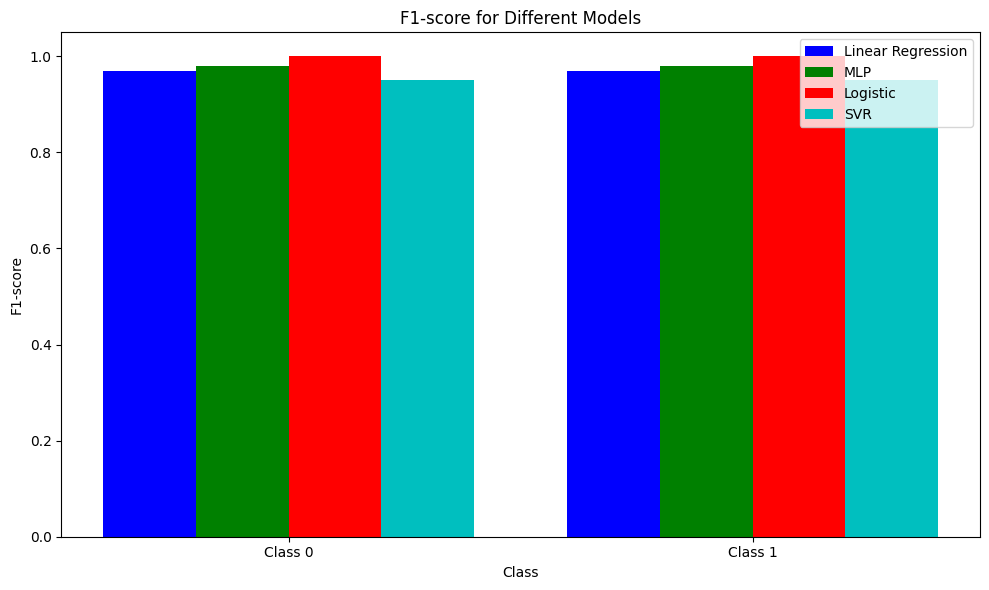

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# F1-score for each model and class
f1_scores = {
    'Linear Regression': classification_rep_linreg.split('\n')[2:-5],
    'MLP': classification_rep_mlp.split('\n')[2:-5],
    'Logistic': classification_rep_logreg.split('\n')[2:-5],
    'SVR': classification_rep_svr.split('\n')[2:-5]
}

# Extract F1-score for each model
f1_data = {}
for model, f1 in f1_scores.items():
    f1_data[model] = [float(f.split()[3]) for f in f1]

# Get class labels
class_labels = [f'Class {i}' for i in range(len(f1_data['Linear Regression']))]

# Plot F1-score
num_models = len(f1_data)
bar_width = 0.2
index = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c']  # Define colors for each model
for i, (model, f1_scores) in enumerate(f1_data.items()):
    plt.bar(index + i * bar_width, f1_scores, bar_width, label=model, color=colors[i])

plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score for Different Models')
plt.xticks(index + bar_width * (num_models - 1) / 2, class_labels)
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np

# Define classifiers
logreg = LogisticRegression(max_iter=2000, random_state=42)
svr = SVR()
mlp = MLPClassifier(random_state=42)
linreg = LinearRegression()

# Train Logistic Regression
logreg.fit(x_train, y_train)

# Train svr
svr.fit(x_train, y_train)

# Train MLP
mlp.fit(x_train, y_train)

# Train Linear Regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)  # Fit Linear Regression model

# Predict using Linear Regression
linreg_predictions_train = linreg.predict(x_train)
linreg_predictions_test = linreg.predict(x_test)

# Define a function to binarize the predictions for Linear Regression
def binarize_predictions(predictions):
    return [1 if pred >= 0.5 else 0 for pred in predictions]

# Convert Linear Regression predictions to binary
linreg_predictions_train_binary = binarize_predictions(linreg_predictions_train)
linreg_predictions_test_binary = binarize_predictions(linreg_predictions_test)

# Stack Linear Regression predictions with other features
x_train_combined = np.column_stack((x_train, linreg_predictions_train_binary))
x_test_combined = np.column_stack((x_test, linreg_predictions_test_binary))

# Define VotingClassifier with classifiers and the combined feature set
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('svr', SVR),
    ('mlp', mlp),
    ('linreg', linreg)
])

# Predict using VotingClassifier
voting_predictions = mode([y_pred_logreg, y_pred_svr, y_pred_mlp, y_pred_linreg]) [0]

# Calculate accuracy for VotingClassifier
accuracy_voting = accuracy_score(y_test, voting_predictions)

print("Accuracy for Voting Classifier:", accuracy_voting)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Voting Classifier: 0.9974271012006861


In [57]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x_train, y_train, x_test, y_test are already defined

# Define classifiers
logreg = LogisticRegression(max_iter=2000, random_state=42)
linreg = LinearRegression()
mlp = MLPClassifier(random_state=42)
svr = SVR()

# Train the models
logreg.fit(x_train, y_train)
linreg.fit(x_train, y_train)
mlp.fit(x_train, y_train)
svr.fit(x_train, y_train)

# Generate predictions
y_pred_logreg = logreg.predict(x_test)
y_pred_linreg = linreg.predict(x_test)
y_pred_mlp = mlp.predict(x_test)
y_pred_svr = svr.predict(x_test)

# Convert SVR predictions to binary format using a threshold
threshold = 0.5
y_pred_svr_binary = np.array([1 if pred >= threshold else 0 for pred in y_pred_svr])

# Combine predictions using majority voting
voting_predictions = np.array([np.argmax(np.bincount([pred_logreg, pred_linreg, pred_mlp, pred_svr])) for
                               pred_logreg, pred_linreg, pred_mlp, pred_svr in
                               zip(y_pred_logreg, y_pred_linreg, y_pred_mlp, y_pred_svr_binary)])

# Calculate accuracy for the voting prediction model
accuracy_voting = (accuracy_score(y_test, voting_predictions)*100)

print("Accuracy for Voting Classifier:", accuracy_voting)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Voting Classifier: 98.29545454545455


Confusion Matrix for Voting Classifier:
[[4620    0]
 [ 159 4549]]
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4620
           1       1.00      0.97      0.98      4708

    accuracy                           0.98      9328
   macro avg       0.98      0.98      0.98      9328
weighted avg       0.98      0.98      0.98      9328



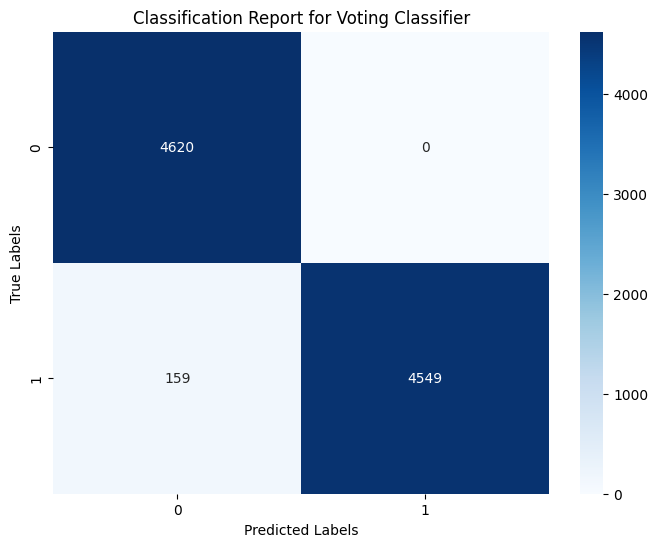

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, voting_predictions)

# Calculate classification report for Voting Classifier
classification_rep_voting = classification_report(y_test, voting_predictions)

print("Confusion Matrix for Voting Classifier:")
print(conf_matrix_voting)
print("Classification Report for Voting Classifier:")
print(classification_rep_voting)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Classification Report for Voting Classifier")
plt.show()


# roc

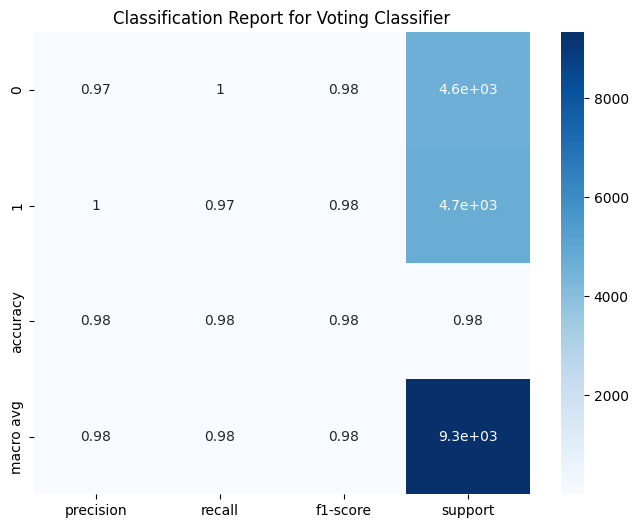

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report for Voting Classifier
classification_rep_voting = classification_report(y_test, voting_predictions, output_dict=True)

# Convert classification report to a DataFrame
report_df = pd.DataFrame(classification_rep_voting).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Blues")
plt.title("Classification Report for Voting Classifier")
plt.show()


In [60]:
from sklearn.metrics import classification_report

# Generate classification report for Voting Classifier
classification_rep_voting = classification_report(y_test, voting_predictions)

print("Classification Report for Voting Classifier:")
print(classification_rep_voting)


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4620
           1       1.00      0.97      0.98      4708

    accuracy                           0.98      9328
   macro avg       0.98      0.98      0.98      9328
weighted avg       0.98      0.98      0.98      9328



In [68]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Convert SVR predictions to binary format using a threshold
threshold = 0.5
y_pred_svr_binary = np.array([1 if pred >= threshold else 0 for pred in y_pred_svr])

# Convert all predictions to numpy arrays
y_pred_logreg = np.array(y_pred_logreg)
y_pred_mlp = np.array(y_pred_mlp)

# Calculate accuracy scores for each model
accuracy_linreg = int(accuracy_score(y_test, y_pred_linreg_binary) * 100)
accuracy_mlp = int(accuracy_score(y_test, y_pred_mlp) * 100)
accuracy_svr = int(accuracy_score(y_test, y_pred_svr_binary) * 100)  # Use binary SVR predictions
accuracy_logreg = int(accuracy_score(y_test, y_pred_logreg) * 100)

# Calculate average accuracy
average_accuracy = int((accuracy_linreg + accuracy_mlp + accuracy_svr + accuracy_logreg) / 4)

print("Average Accuracy for all Models:", average_accuracy)





Average Accuracy for all Models: 97


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the models and their corresponding predictions
models = ['Linear Regression', 'Logistic Regression', 'MLP', 'SVR']
predictions = [y_pred_linreg_binary, y_pred_logreg, y_pred_mlp, y_pred_svr_binary]

# Calculate precision, recall, and F1-score for each model and user
for i, model in enumerate(models):
    precision = precision_score(y_test, predictions[i])
    recall = recall_score(y_test, predictions[i])
    f1 = f1_score(y_test, predictions[i])

    print(f"\nMetrics for {model}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


Metrics for Linear Regression:
Precision: 0.95
Recall: 1.00
F1-Score: 0.97

Metrics for Logistic Regression:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Metrics for MLP:
Precision: 0.96
Recall: 0.99
F1-Score: 0.98

Metrics for SVR:
Precision: 0.93
Recall: 0.97
F1-Score: 0.95


Accuracy for Average Classifier: 98.71355060034305


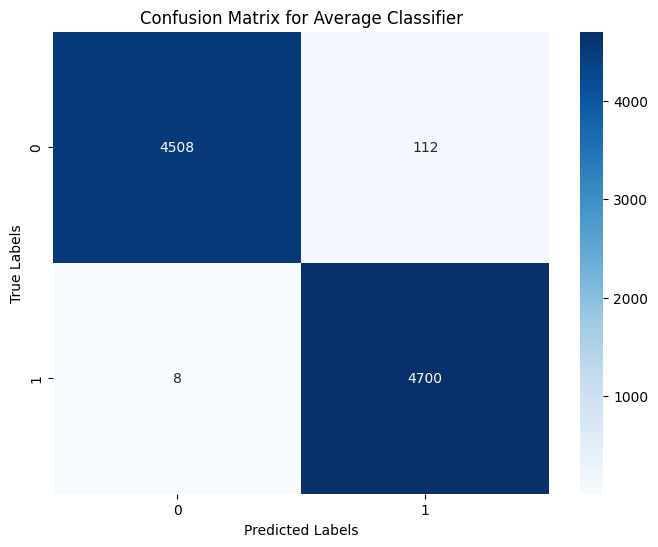

In [72]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert SVR predictions to binary format using a threshold
threshold = 0.5
y_pred_svr_binary = np.array([1 if pred >= threshold else 0 for pred in y_pred_svr])

# Convert all predictions to numpy arrays
y_pred_logreg = np.array(y_pred_logreg)
y_pred_mlp = np.array(y_pred_mlp)

# Calculate accuracy scores for each model
accuracy_linreg = accuracy_score(y_test, y_pred_linreg_binary)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_svr = accuracy_score(y_test, y_pred_svr_binary)  # Use binary SVR predictions
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# Calculate total accuracy for normalization
total_accuracy = accuracy_linreg + accuracy_mlp + accuracy_svr + accuracy_logreg

# Calculate weights using accuracy scores
weight_linreg = accuracy_linreg / total_accuracy
weight_mlp = accuracy_mlp / total_accuracy
weight_svr = accuracy_svr / total_accuracy
weight_logreg = accuracy_logreg / total_accuracy
# Calculate average prediction using weighted sum of predictions
average_predictions = (weight_linreg * y_pred_linreg +
                       weight_mlp * y_pred_mlp +
                       weight_logreg * y_pred_logreg +
                       weight_svr * y_pred_svr_binary)  # Use binary SVR predictions

# Convert average predictions to binary
average_predictions_binary = np.array([1 if pred >= 0.5 else 0 for pred in average_predictions])

# Calculate accuracy for average classifier
accuracy_average = (accuracy_score(y_test, average_predictions_binary)*100)

print("Accuracy for Average Classifier:", accuracy_average)

conf_matrix_average = confusion_matrix(y_test, average_predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_average, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix for Average Classifier")
plt.show()